In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
import h5py
from peakfinder import detect_peaks
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [3]:
# lstm model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import to_categorical
import ast

In [4]:
# cnn lstm model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.layers import ConvLSTM2D

In [5]:
#df_labels = pd.read_csv(r'C:\Users\kj4755\OneDrive - The Open University\SPIN\Transmission\Scripts\smooth_labels.dat',delimiter = '\s+',header = None,index_col = None)
#df_labels = pd.read_csv(r'/Users/kunal/OneDrive - The Open University/SPIN/Transmission/Scripts/smooth_labels.dat',delimiter = '\s+',header = None,index_col = None)
#df_labels = pd.read_csv(r'C:\Users\kj4755\OneDrive - The Open University\SPIN\Transmission\Scripts\encoded labels.txt',delimiter = '\s+',header = None,index_col = None)
#df_labels = pd.read_csv(r'C:\Users\kj4755\OneDrive - The Open University\SPIN\Transmission\Scripts\modified_labels1.txt',delimiter = '\s+',header = None,index_col = None)
df_labels = pd.read_csv(r'C:\Users\kj4755\OneDrive - The Open University\SPIN\Transmission\Scripts\new labels1.txt',delimiter = '\s+',header = None,index_col = None)

df_labels.columns = ['File','Label']

In [6]:
df_labels.Label.value_counts()

1.0    154
2.0     99
3.0     54
0.0     40
4.0     28
Name: Label, dtype: int64

In [7]:
z = []
y = []

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

f_wav = 250

rootDir = r'C:\Users\kj4755\OneDrive - The Open University\SPIN\data\level_1p0_data\New occultations'
#rootDir = r'/Users/kunal/OneDrive - The Open University/SPIN/data/level_1p0_data/New occultations'
os.chdir(rootDir)
list_of_files = os.listdir(os.getcwd())

for each_df_file in df_labels['File']:
    for each_file in list_of_files:
        if each_file.startswith(each_df_file):
            
            file = h5py.File(r'C:\Users\kj4755\OneDrive - The Open University\SPIN\data\level_1p0_data\New occultations\%s' %each_file,'r')
            #file = h5py.File(r'/Users/kunal/OneDrive - The Open University/SPIN/data/level_1p0_data/New occultations/%s' %each_file,'r')

            
            T = np.array(file['Science/Transmission'])
            TangAlt = np.array(file['Geometry/Point0/TangentAltSurface'])
            wav = np.array(file['Science/Wavelength'])

            avg_TangAlt = []

            for j in range(TangAlt.shape[0]):
                avg_TangAlt.append(np.mean(TangAlt[j,:]))



            T_wav = T[:,np.array(np.where(wav == find_nearest(wav,f_wav))).flatten()].reshape(-1,)

            if T_wav[0] > 0.5:
                T_wav = T_wav[::-1]

            z.append(T_wav)
            
            if avg_TangAlt[0] > 100:
                avg_TangAlt = avg_TangAlt[::-1]
            
            y.append(avg_TangAlt)
            
z = np.array(z)
y = np.array(y)

File     20180504_180633_1p0_UVIS_U.h5
Label                                2
Name: 21, dtype: object


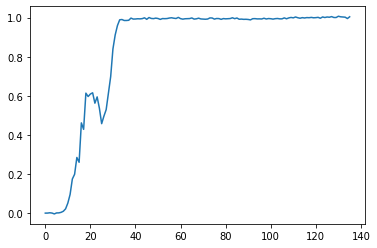

In [8]:
plt.plot(z[21])
print(df_labels.iloc[21])

In [9]:
def show_false_files_encoded(show_files):
    
    false_files = []
    index = []
    diff = np.array(preds - testy)
    
    if show_files:
        for i,_ in enumerate(diff):
            if np.array_equal(_,np.array([0.,0.,0.,0.])) == False:
                false_files.append(df_labels['File'][id_test[i]])
                index.append(id_test[i])
                
        df_false = pd.DataFrame(columns=['Filename','True Label','Predicted Label'],index=index)
        df_false['Filename'] = false_files
        
        a = []
        b = []
        
        for j,_ in enumerate(np.array(preds - testy)):
            if np.array_equal(_,np.array([0.,0.,0.,0.])) == False:
                a.append(testy[j])
                b.append(preds[j])

        df_false['True Label'] = a
        df_false['Predicted Label'] = b
        df_false.sort_index(inplace = True)
        

        os.chdir(r'C:\Users\kj4755\OneDrive - The Open University\SPIN\Transmission\Plot_%snm' %f_wav)
        file_list = os.listdir()
        for each_file in file_list:
            for _ in false_files:
                if each_file.startswith(_):
                    img = Image.open(each_file)
                    img.show()
                    
    else:
        
        for i,_ in enumerate(diff):
            if np.array_equal(_,np.array([0.,0.,0.,0.])) == False:
                false_files.append(df_labels['File'][id_test[i]])
                index.append(id_test[i])
                
        df_false = pd.DataFrame(columns=['Filename','True Label','Predicted Label'],index=index)
        df_false['Filename'] = false_files
        
        a = []
        b = []
        
        for j,_ in enumerate(np.array(preds - testy)):
            if np.array_equal(_,np.array([0.,0.,0.,0.])) == False:
                a.append(testy[j])
                b.append(preds[j])

        df_false['True Label'] = a
        df_false['Predicted Label'] = b
        df_false.sort_index(inplace = True)
        
    return df_false


def show_false_files(show_files):
    
    if show_files:
        
        false_files = df_labels['File'][id_test[np.where(abs(pred_classes-testy1) != 0)]].values
        df_false = pd.DataFrame(columns=['Filename','True Label','Predicted Label'],index=id_test[np.where(abs(pred_classes-testy1) != 0)])
        df_false['Filename'] = false_files
        a = []
        b = []
        for i in range(len(testy1)):
            if abs(pred_classes[i]-testy1[i]) != 0:
                a.append(testy1[i])
                b.append(pred_classes[i])

        df_false['True Label'] = a
        df_false['Predicted Label'] = b
        df_false.sort_index(inplace = True)
        
        if show_files:
            os.chdir(r'C:\Users\kj4755\OneDrive - The Open University\SPIN\Transmission\Plot_%snm' %f_wav)
        file_list = os.listdir()
        for each_file in file_list:
            for _ in false_files:
                if each_file.startswith(_):
                    img = Image.open(each_file)
                    img.show()
                    
    else:
        
        false_files = df_labels['File'][id_test[np.where(abs(pred_classes-testy1) != 0)]].values
        df_false = pd.DataFrame(columns=['Filename','True Label','Predicted Label'],index=id_test[np.where(abs(pred_classes-testy1) != 0)])
        df_false['Filename'] = false_files
        a = []
        b = []
        for i in range(len(testy1)):
            if abs(pred_classes[i]-testy1[i]) != 0:
                a.append(testy1[i])
                b.append(pred_classes[i])

        df_false['True Label'] = a
        df_false['Predicted Label'] = b
        df_false.sort_index(inplace = True)
        
    return df_false

In [10]:
alt_interp = np.arange(0,274,1)
t_interp = []
for i in range(len(z)):
    z_interp = np.interp(alt_interp,y[i],z[i])
    t_interp.append(z_interp)
t_interp = np.array(t_interp)
t_interp[t_interp < 0] = 0

In [11]:
t_interp.shape

(375, 274)

In [12]:
t_clipped = []
for j,t in enumerate(t_interp):
    clip = np.array([])
    peak_idx = detect_peaks(t)
    for _ in t[peak_idx]:
        clip = np.append(clip,_)
        if _ > 0.98:
            break
    t_clipped.append(t[:np.where(t == clip[-1])[0][0]])
t_clipped = np.array(t_clipped)    

In [13]:
clipped_len = []
for t in t_clipped: 
    clipped_len.append(len(t))

t_clipped_max = t_interp[:,:max(clipped_len)]

In [14]:
for i,t in enumerate(t_clipped_max):
    valley_idx = detect_peaks(t,mph=0.005,mpd=5)
    for _ in valley_idx:
        if 0 <= _ <= 20:
            t_clipped_max[i][_]=5
            break
        if 20 < _ <= 40:
            t_clipped_max[i][_]=10
            break

In [15]:
t_interp_shaped = []

for _ in range(t_interp.shape[1]):
    t_interp_shaped.append(t_interp[:,_])

t_interp_shaped = np.array(t_interp_shaped)   

t_interp_shaped = t_interp.reshape(t_interp_shaped.shape[1],t_interp_shaped.shape[0],1)

In [16]:
t_clipped_max_shaped = []

for _ in range(t_clipped_max.shape[1]):
    t_clipped_max_shaped.append(t_clipped_max[:,_])

t_clipped_max_shaped = np.array(t_clipped_max_shaped)  

t_clipped_max_shaped = t_clipped_max.reshape(t_clipped_max_shaped.shape[1],t_clipped_max_shaped.shape[0],1)

In [17]:
alt_interp = np.arange(0,274,1)
t_interp = []
for i in range(len(z)):
    z_interp = np.interp(alt_interp,y[i],z[i])
    t_interp.append(z_interp)
t_interp = np.array(t_interp)
t_interp[t_interp < 0] = 0

In [18]:
indices = np.arange(len(np.array(df_labels['Label'])))
#trainX, testX, trainy1, testy1,id_train,id_test = train_test_split(t_clipped_max_shaped, np.array(df_labels.Label),indices, test_size=0.33,random_state = 10)
trainX, testX, trainy1, testy1,id_train,id_test = train_test_split(t_interp_shaped, np.array(df_labels.Label),indices, test_size=0.33,random_state = 10)

trainy = to_categorical(trainy1)
testy = to_categorical(testy1)

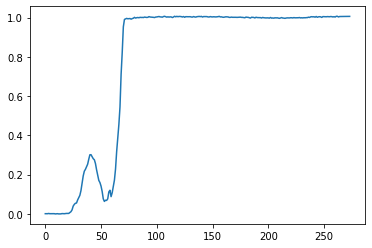

In [19]:
plt.plot(trainX[0])

In [20]:
'''indices = np.arange(len(np.array(df_labels['Label'])))

#trainX, testX, trainy1, testy1,id_train,id_test = train_test_split(t_interp_shaped, np.array(df_labels.Label.apply(ast.literal_eval)),indices, test_size=0.33)#,random_state = 10)
trainX, testX, trainy1, testy1,id_train,id_test = train_test_split(t_clipped_max_shaped, np.array(df_labels.Label.apply(ast.literal_eval)),indices, test_size=0.33,random_state = 10)

trainy = np.zeros((len(trainy1),4))
testy = np.zeros((len(testy1),4))

for i in range(len(trainy1)):
    for j in range(len(trainy1[i])):
        trainy[i,j] = trainy1[i][j]
        
for i in range(len(testy1)):
    for j in range(len(testy1[i])):
        testy[i,j] = testy1[i][j]'''

"indices = np.arange(len(np.array(df_labels['Label'])))\n\n#trainX, testX, trainy1, testy1,id_train,id_test = train_test_split(t_interp_shaped, np.array(df_labels.Label.apply(ast.literal_eval)),indices, test_size=0.33)#,random_state = 10)\ntrainX, testX, trainy1, testy1,id_train,id_test = train_test_split(t_clipped_max_shaped, np.array(df_labels.Label.apply(ast.literal_eval)),indices, test_size=0.33,random_state = 10)\n\ntrainy = np.zeros((len(trainy1),4))\ntesty = np.zeros((len(testy1),4))\n\nfor i in range(len(trainy1)):\n    for j in range(len(trainy1[i])):\n        trainy[i,j] = trainy1[i][j]\n        \nfor i in range(len(testy1)):\n    for j in range(len(testy1[i])):\n        testy[i,j] = testy1[i][j]"

In [21]:
'''#trainX = t_clipped_max_shaped[:120]
#testX = t_clipped_max_shaped[120:]
#trainX = t_interp_shaped[:120]
#testX = t_interp_shaped[120:]
#trainy1 = np.array(df_labels.Label[:120].apply(ast.literal_eval))
#testy1 = np.array(df_labels.Label[120:].apply(ast.literal_eval))
#trainy = np.zeros((len(trainy1),4))
#testy = np.zeros((len(testy1),4))

for i in range(len(trainy1)):
    for j in range(len(trainy1[i])):
        trainy[i,j] = trainy1[i][j]
        
for i in range(len(testy1)):
    for j in range(len(testy1[i])):
        testy[i,j] = testy1[i][j]

'''

'#trainX = t_clipped_max_shaped[:120]\n#testX = t_clipped_max_shaped[120:]\n#trainX = t_interp_shaped[:120]\n#testX = t_interp_shaped[120:]\n#trainy1 = np.array(df_labels.Label[:120].apply(ast.literal_eval))\n#testy1 = np.array(df_labels.Label[120:].apply(ast.literal_eval))\n#trainy = np.zeros((len(trainy1),4))\n#testy = np.zeros((len(testy1),4))\n\nfor i in range(len(trainy1)):\n    for j in range(len(trainy1[i])):\n        trainy[i,j] = trainy1[i][j]\n        \nfor i in range(len(testy1)):\n    for j in range(len(testy1[i])):\n        testy[i,j] = testy1[i][j]\n\n'

In [22]:
'''#LSTM
verbose, epochs, batch_size = 1, 500, 32
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
#class_weights = {[0,1,0,0] : 1.,[0,0,0,1] : 2., [0,0,1,0] : 3., [1,0,0,0] : 4., [0,0,1,1] : 4.}
class_weights = {1 : 1.,2 : 1.5, 3 : 3,4 : 5,0 : 3}

model = Sequential()
model.add(LSTM(200, input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
adam = Adam(lr = 0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
# fit network
model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose,class_weight = class_weights)
# evaluate model
#_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
#print(accuracy)'''

"#LSTM\nverbose, epochs, batch_size = 1, 500, 32\nn_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]\n#class_weights = {[0,1,0,0] : 1.,[0,0,0,1] : 2., [0,0,1,0] : 3., [1,0,0,0] : 4., [0,0,1,1] : 4.}\nclass_weights = {1 : 1.,2 : 1.5, 3 : 3,4 : 5,0 : 3}\n\nmodel = Sequential()\nmodel.add(LSTM(200, input_shape=(n_timesteps,n_features)))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(200, activation='relu'))\nmodel.add(Dense(n_outputs, activation='softmax'))\nadam = Adam(lr = 0.001)\nmodel.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])\n# fit network\nmodel.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose,class_weight = class_weights)\n# evaluate model\n#_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)\n#print(accuracy)"

In [23]:
#CNNLSTM
verbose, epochs, batch_size = 1, 500, 32
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
# reshape data into time steps of sub-sequences
n_steps, n_length = 2, 137 #interp
#n_steps, n_length = 1, 257 #clipped max
trainX = trainX.reshape((trainX.shape[0], n_steps, n_length, n_features))
testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features))
# define model
#class_weights = {1 : 1.,2 : 1.5, 3 : 3,4 : 5,0 : 3}
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
adam = Adam(lr = 0.0001)
model.compile(loss='categorical_crossentropy', optimizer = adam, metrics=['accuracy'])
# fit network
model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)#,class_weight = class_weights)

W0916 15:59:06.198253 14664 deprecation_wrapper.py:119] From C:\Users\kj4755\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0916 15:59:06.258204 14664 deprecation_wrapper.py:119] From C:\Users\kj4755\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0916 15:59:06.349954 14664 deprecation_wrapper.py:119] From C:\Users\kj4755\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0916 15:59:06.435268 14664 deprecation_wrapper.py:119] From C:\Users\kj4755\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Pleas

Epoch 1/500
251/251 [==============================] - 2s 10ms/step - loss: 1.5716 - acc: 0.3586
Epoch 2/500
251/251 [==============================] - 1s 4ms/step - loss: 1.5169 - acc: 0.3705
Epoch 3/500
251/251 [==============================] - 1s 4ms/step - loss: 1.4874 - acc: 0.3785
Epoch 4/500
251/251 [==============================] - 1s 4ms/step - loss: 1.4486 - acc: 0.3944
Epoch 5/500
251/251 [==============================] - 1s 4ms/step - loss: 1.4777 - acc: 0.3546
Epoch 6/500
251/251 [==============================] - 1s 4ms/step - loss: 1.4716 - acc: 0.3745
Epoch 7/500
251/251 [==============================] - 1s 4ms/step - loss: 1.4777 - acc: 0.3546
Epoch 8/500
251/251 [==============================] - 1s 4ms/step - loss: 1.4480 - acc: 0.3785
Epoch 9/500
251/251 [==============================] - 1s 4ms/step - loss: 1.4540 - acc: 0.3785
Epoch 10/500
251/251 [==============================] - 1s 4ms/step - loss: 1.4387 - acc: 0.3825
Epoch 11/500
251/251 [================

251/251 [==============================] - 1s 4ms/step - loss: 1.0053 - acc: 0.6016
Epoch 86/500
251/251 [==============================] - 1s 4ms/step - loss: 0.9865 - acc: 0.6016
Epoch 87/500
251/251 [==============================] - 1s 3ms/step - loss: 1.0119 - acc: 0.6175
Epoch 88/500
251/251 [==============================] - 1s 3ms/step - loss: 0.9665 - acc: 0.6295
Epoch 89/500
251/251 [==============================] - 1s 3ms/step - loss: 0.9993 - acc: 0.6574
Epoch 90/500
251/251 [==============================] - 1s 3ms/step - loss: 1.0051 - acc: 0.6255
Epoch 91/500
251/251 [==============================] - 1s 3ms/step - loss: 0.9807 - acc: 0.6454
Epoch 92/500
251/251 [==============================] - 1s 3ms/step - loss: 1.0116 - acc: 0.6135
Epoch 93/500
251/251 [==============================] - 1s 3ms/step - loss: 0.9987 - acc: 0.6135
Epoch 94/500
251/251 [==============================] - 1s 4ms/step - loss: 0.9975 - acc: 0.6135
Epoch 95/500
251/251 [=====================

251/251 [==============================] - 1s 5ms/step - loss: 0.7951 - acc: 0.7251
Epoch 169/500
251/251 [==============================] - 1s 4ms/step - loss: 0.7947 - acc: 0.6813
Epoch 170/500
251/251 [==============================] - 1s 4ms/step - loss: 0.8053 - acc: 0.6693
Epoch 171/500
251/251 [==============================] - 1s 4ms/step - loss: 0.8020 - acc: 0.6932
Epoch 172/500
251/251 [==============================] - 1s 4ms/step - loss: 0.8254 - acc: 0.6932
Epoch 173/500
251/251 [==============================] - 1s 4ms/step - loss: 0.7760 - acc: 0.7131
Epoch 174/500
251/251 [==============================] - 1s 4ms/step - loss: 0.8059 - acc: 0.6892
Epoch 175/500
251/251 [==============================] - 1s 4ms/step - loss: 0.7987 - acc: 0.7052
Epoch 176/500
251/251 [==============================] - 1s 4ms/step - loss: 0.8353 - acc: 0.6653
Epoch 177/500
251/251 [==============================] - 1s 4ms/step - loss: 0.8150 - acc: 0.6853
Epoch 178/500
251/251 [===========

251/251 [==============================] - 1s 4ms/step - loss: 0.6581 - acc: 0.7291
Epoch 252/500
251/251 [==============================] - 1s 3ms/step - loss: 0.6996 - acc: 0.7211
Epoch 253/500
251/251 [==============================] - 1s 3ms/step - loss: 0.6241 - acc: 0.7450
Epoch 254/500
251/251 [==============================] - 1s 3ms/step - loss: 0.6270 - acc: 0.7689
Epoch 255/500
251/251 [==============================] - 1s 3ms/step - loss: 0.6909 - acc: 0.7371
Epoch 256/500
251/251 [==============================] - 1s 4ms/step - loss: 0.6766 - acc: 0.7251
Epoch 257/500
251/251 [==============================] - 1s 4ms/step - loss: 0.6651 - acc: 0.7211
Epoch 258/500
251/251 [==============================] - 1s 4ms/step - loss: 0.7120 - acc: 0.7131
Epoch 259/500
251/251 [==============================] - 1s 4ms/step - loss: 0.6601 - acc: 0.7371
Epoch 260/500
251/251 [==============================] - 1s 4ms/step - loss: 0.6686 - acc: 0.7371
Epoch 261/500
251/251 [===========

251/251 [==============================] - 1s 4ms/step - loss: 0.5750 - acc: 0.7649
Epoch 335/500
251/251 [==============================] - 1s 4ms/step - loss: 0.5355 - acc: 0.7968
Epoch 336/500
251/251 [==============================] - 1s 3ms/step - loss: 0.6005 - acc: 0.7530
Epoch 337/500
251/251 [==============================] - 1s 3ms/step - loss: 0.5561 - acc: 0.7849
Epoch 338/500
251/251 [==============================] - 1s 3ms/step - loss: 0.5867 - acc: 0.7729
Epoch 339/500
251/251 [==============================] - 1s 3ms/step - loss: 0.6111 - acc: 0.7809
Epoch 340/500
251/251 [==============================] - 1s 3ms/step - loss: 0.5690 - acc: 0.7729
Epoch 341/500
251/251 [==============================] - 1s 3ms/step - loss: 0.5268 - acc: 0.7849
Epoch 342/500
251/251 [==============================] - 1s 3ms/step - loss: 0.5892 - acc: 0.7809
Epoch 343/500
251/251 [==============================] - 1s 3ms/step - loss: 0.5891 - acc: 0.7490
Epoch 344/500
251/251 [===========

251/251 [==============================] - 1s 4ms/step - loss: 0.4866 - acc: 0.8247
Epoch 418/500
251/251 [==============================] - 1s 4ms/step - loss: 0.4628 - acc: 0.8287A: 0s - loss: 0.3962 - acc: 
Epoch 419/500
251/251 [==============================] - 1s 4ms/step - loss: 0.4974 - acc: 0.8167
Epoch 420/500
251/251 [==============================] - 1s 5ms/step - loss: 0.4669 - acc: 0.8127
Epoch 421/500
251/251 [==============================] - 1s 4ms/step - loss: 0.5114 - acc: 0.8008
Epoch 422/500
251/251 [==============================] - 1s 4ms/step - loss: 0.4931 - acc: 0.8088
Epoch 423/500
251/251 [==============================] - 1s 4ms/step - loss: 0.5000 - acc: 0.8127
Epoch 424/500
251/251 [==============================] - 1s 4ms/step - loss: 0.4590 - acc: 0.8446
Epoch 425/500
251/251 [==============================] - 1s 4ms/step - loss: 0.4611 - acc: 0.8287
Epoch 426/500
251/251 [==============================] - 1s 4ms/step - loss: 0.4744 - acc: 0.7968
Epoch 

251/251 [==============================] - 1s 3ms/step - loss: 0.3974 - acc: 0.8406


In [24]:
#ConvLSTM
'''verbose, epochs, batch_size = 1, 300, 32
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
# reshape into subsequences (samples, time steps, rows, cols, channels)
n_steps, n_length = 2, 137 #interp
#n_steps, n_length = 1, 97 #clipped max
class_weights = {1 : 1.,2 : 2.8, 3 : 1.9,4 : 4.5,0 : 4.5}
trainX = trainX.reshape((trainX.shape[0], n_steps, 1, n_length, n_features))
testX = testX.reshape((testX.shape[0], n_steps, 1, n_length, n_features))
# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=(n_steps, 1, n_length, n_features)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose,class_weight = class_weights)'''

"verbose, epochs, batch_size = 1, 300, 32\nn_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]\n# reshape into subsequences (samples, time steps, rows, cols, channels)\nn_steps, n_length = 2, 137 #interp\n#n_steps, n_length = 1, 97 #clipped max\nclass_weights = {1 : 1.,2 : 2.8, 3 : 1.9,4 : 4.5,0 : 4.5}\ntrainX = trainX.reshape((trainX.shape[0], n_steps, 1, n_length, n_features))\ntestX = testX.reshape((testX.shape[0], n_steps, 1, n_length, n_features))\n# define model\nmodel = Sequential()\nmodel.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=(n_steps, 1, n_length, n_features)))\nmodel.add(Dropout(0.5))\nmodel.add(Flatten())\nmodel.add(Dense(100, activation='relu'))\nmodel.add(Dense(n_outputs, activation='softmax'))\nmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])\n# fit network\nmodel.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose,class_weight = class_weig

In [25]:
pred_classes = model.predict_classes(testX)
print(classification_report(pred_classes,testy1))

              precision    recall  f1-score   support

           0       0.12      0.20      0.15         5
           1       0.78      0.82      0.80        55
           2       0.64      0.66      0.65        32
           3       0.54      0.35      0.42        20
           4       0.25      0.25      0.25        12

    accuracy                           0.62       124
   macro avg       0.47      0.45      0.45       124
weighted avg       0.62      0.62      0.62       124



In [26]:
'''preds = model.predict(testX)
cut_off = 0.55
preds[preds >= cut_off] = 1
preds[preds < cut_off] = 0

a = 0
for _ in np.array(preds - testy):
    if np.array_equal(_,np.array([0.,0.,0.,0.])):
        a+=1
print('Accuracy = ',a/len(preds-testy)*100, '%')'''

"preds = model.predict(testX)\ncut_off = 0.55\npreds[preds >= cut_off] = 1\npreds[preds < cut_off] = 0\n\na = 0\nfor _ in np.array(preds - testy):\n    if np.array_equal(_,np.array([0.,0.,0.,0.])):\n        a+=1\nprint('Accuracy = ',a/len(preds-testy)*100, '%')"

In [27]:
'''pred_classes = model.predict_classes(testX)
df_classes = pd.read_csv(r'C:\Users\kj4755\OneDrive - The Open University\SPIN\Transmission\Scripts\modified_labels1.txt',delimiter = ' ',header = None,index_col = None)
df_classes.columns = ['File','Label']
print(classification_report(pred_classes,df_classes.Label[id_test]))
'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 73-74: truncated \UXXXXXXXX escape (<ipython-input-27-3673c6ae64f3>, line 5)

In [ ]:
show_false_files(show_files=False)
#show_false_files_encoded(show_files=False)